## Setup

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import datetime
import pandas as pd

#from keras.models import Sequential

#from keras.layers import Dense, Activation

import seaborn as sns
sns.set()
%load_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.imports import *
from fastai.tabular import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
coinbase=pd.read_csv('btc_clean_2.csv')

In [89]:
from datetime import datetime

def timestampToDateTime(timestamp):
    return datetime.fromtimestamp(timestamp)
#Not needed for our data since we already have it in date.
#coinbase['DateTime']=coinbase['Date'].apply(timestampToDateTime)

coinbase['DateTime'] = pd.to_datetime(coinbase['Date'])
coinbase.dtypes

Date                   object
Open                  float64
High                  float64
Low                   float64
Close                 float64
Adj Close             float64
Volume                float64
GDP                   float64
inflation             float64
MoneySupply           float64
DateTime       datetime64[ns]
dtype: object

In [90]:
(coinbase.head())

,Date,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,DateTime
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,1.752720e+13,1.849827,11931.5,2014-09-17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,1.752720e+13,1.849827,11931.5,2014-09-18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,1.752720e+13,1.849827,11931.5,2014-09-19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,1.752720e+13,1.849827,11931.5,2014-09-20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,1.752720e+13,1.849827,11931.5,2014-09-21


Let's get rid of the timestamp Now

In [91]:
coinbase.drop('Date',axis=1,inplace=True) 

Let's verify if everything looks good

In [92]:
(coinbase.head())

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,DateTime
0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,1.752720e+13,1.849827,11931.5,2014-09-17
1,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,1.752720e+13,1.849827,11931.5,2014-09-18
2,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,1.752720e+13,1.849827,11931.5,2014-09-19
3,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,1.752720e+13,1.849827,11931.5,2014-09-20
4,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,1.752720e+13,1.849827,11931.5,2014-09-21


In [93]:
coinbase.isna().sum()/coinbase.count()

Open           0.0
High           0.0
Low            0.0
Close          0.0
Adj Close      0.0
Volume         0.0
GDP            0.0
inflation      0.0
MoneySupply    0.0
DateTime       0.0
dtype: float64

In [94]:
(coinbase[coinbase['DateTime']=='2016'])

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,DateTime
471,430.721008,436.246002,427.515015,434.334015,434.334015,36278900.0,1.871500e+13,1.035269,12355.3,2016-01-01


In [95]:
timeindex=pd.DatetimeIndex(coinbase['DateTime'])

In [96]:
coinbase.set_index(timeindex, inplace=True)

In [97]:
(coinbase['2016'].head())

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,DateTime
DateTime,,,,,,,,,,
2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900.0,1.871500e+13,1.035269,12355.3,2016-01-01
2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600.0,1.871500e+13,1.035269,12355.3,2016-01-02
2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800.0,1.871500e+13,1.035269,12355.3,2016-01-03
2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500.0,1.871500e+13,1.035269,12355.3,2016-01-04
2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600.0,1.871500e+13,1.035269,12454.7,2016-01-05


<AxesSubplot:xlabel='DateTime'>

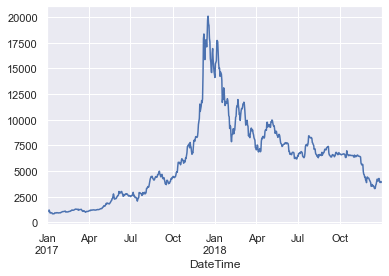

In [98]:
#sns.set(style="darkgrid")
import seaborn as sns; sns.set()
#sns.lineplot(x="Date", y="Close",
#             data=coinbase)

coinbase['2017':'2018']['High'].plot()

#coinbase['2017':'2018']['High'].resample(rule='T').plot()



DateTime
2017-07-31    AxesSubplot(0.125,0.125;0.775x0.755)
2017-08-31    AxesSubplot(0.125,0.125;0.775x0.755)
2017-09-29    AxesSubplot(0.125,0.125;0.775x0.755)
Freq: BM, Name: High, dtype: object

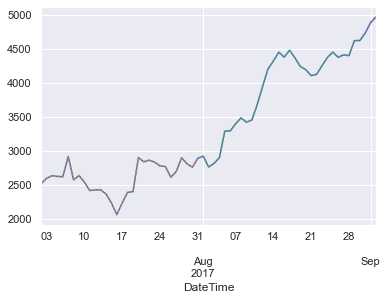

In [20]:
data=coinbase['2017-07-02':'2017-09-02']
data['High'].plot(style="-")
data['High'].resample('BM').plot(style=":")

In [21]:
def preprocess(dataframe):
    data=data.fillna(method='ffill')
    data=add_datepart(data, 'Date')
    return data

In [22]:
coinbase=coinbase.fillna(method='ffill')

In [23]:
coinbase.corr()

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply
Open,1.000000,0.999389,0.999008,0.998710,0.998710,0.777426,0.564476,0.406155,0.722917
High,0.999389,1.000000,0.998887,0.999480,0.999480,0.779564,0.561342,0.404214,0.720521
Low,0.999008,0.998887,1.000000,0.999251,0.999251,0.773006,0.567917,0.407187,0.726696
Close,0.998710,0.999480,0.999251,1.000000,1.000000,0.776565,0.563369,0.404483,0.723130
Adj Close,0.998710,0.999480,0.999251,1.000000,1.000000,0.776565,0.563369,0.404483,0.723130
Volume,0.777426,0.779564,0.773006,0.776565,0.776565,1.000000,0.640199,0.350517,0.779790
GDP,0.564476,0.561342,0.567917,0.563369,0.563369,0.640199,1.000000,0.724447,0.835350
inflation,0.406155,0.404214,0.407187,0.404483,0.404483,0.350517,0.724447,1.000000,0.535700
MoneySupply,0.722917,0.720521,0.726696,0.723130,0.723130,0.779790,0.835350,0.535700,1.000000


In [24]:
coinbase['PriceClose2D']=coinbase['Close']

In [25]:
shift=2 #  days
coinbase['PriceClose2D']=coinbase['PriceClose2D'].shift(-shift)
coinbase=coinbase[:-shift]

In [26]:
coinbase[73:90]

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,DateTime,PriceClose2D
DateTime,,,,,,,,,,,
2014-11-29,376.152008,387.601013,372.144989,375.490997,375.490997,15375600.0,1.752720e+13,1.849827,11931.5,2014-11-29,379.244995
2014-11-30,375.510010,382.527008,373.308990,378.046997,378.046997,9194440.0,1.752720e+13,1.849827,11931.5,2014-11-30,381.315002
2014-12-01,378.248993,383.661987,376.669006,379.244995,379.244995,11763000.0,1.752720e+13,1.849827,11931.5,2014-12-01,375.010010
2014-12-02,379.250000,384.037994,377.863007,381.315002,381.315002,12364100.0,1.752720e+13,1.849827,11931.5,2014-12-02,369.604004
2014-12-03,381.721985,383.026001,374.346008,375.010010,375.010010,13340100.0,1.752720e+13,1.849827,11931.5,2014-12-03,376.854004
2014-12-04,375.717987,378.654999,367.759003,369.604004,369.604004,14529600.0,1.752720e+13,1.849827,11931.5,2014-12-04,374.785004
2014-12-05,369.441986,379.191986,365.756012,376.854004,376.854004,15181800.0,1.752720e+13,1.849827,11931.5,2014-12-05,375.095001
2014-12-06,376.756989,378.447998,370.945007,374.785004,374.785004,7009320.0,1.752720e+13,1.849827,11931.5,2014-12-06,361.908997
2014-12-07,374.835999,376.291992,373.274994,375.095001,375.095001,6491650.0,1.752720e+13,1.849827,11931.5,2014-12-07,352.218994


In [27]:
#Add_Datepart no longer in fastai but implementation found at: https://github.com/fastai/fastai_old/blob/master/dev_nb/x_009a_rossman_data_clean.ipynb
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [28]:
#add_datepart(coinbase,'DateTime')

In [29]:
coinbase['2015']

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,DateTime,PriceClose2D
DateTime,,,,,,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0,1.822470e+13,1.041462,11931.5,2015-01-01,281.082001
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0,1.822470e+13,1.041462,11931.5,2015-01-02,264.195007
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0,1.822470e+13,1.041462,11931.5,2015-01-03,274.473999
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0,1.822470e+13,1.041462,11931.5,2015-01-04,286.188995
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0,1.822470e+13,1.041462,11931.5,2015-01-05,294.337006
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,416.514008,424.006989,408.882996,422.822998,422.822998,53591200.0,1.822470e+13,1.041462,12368.6,2015-12-27,432.983002
2015-12-28,423.342987,429.769012,418.480988,422.278992,422.278992,49638600.0,1.822470e+13,1.041462,12368.6,2015-12-28,426.619995
2015-12-29,422.097992,432.983002,420.627014,432.983002,432.983002,51596500.0,1.822470e+13,1.041462,12355.3,2015-12-29,430.566986


In [30]:
coinbase.corr()

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,PriceClose2D
Open,1.000000,0.999379,0.998995,0.998681,0.998681,0.778323,0.566577,0.408772,0.723468,0.996018
High,0.999379,1.000000,0.998874,0.999469,0.999469,0.780475,0.563413,0.406815,0.721046,0.996695
Low,0.998995,0.998874,1.000000,0.999239,0.999239,0.774112,0.570344,0.410059,0.727562,0.996661
Close,0.998681,0.999469,0.999239,1.000000,1.000000,0.777524,0.565548,0.407158,0.723768,0.997367
Adj Close,0.998681,0.999469,0.999239,1.000000,1.000000,0.777524,0.565548,0.407158,0.723768,0.997367
Volume,0.778323,0.780475,0.774112,0.777524,0.777524,1.000000,0.639812,0.350331,0.778930,0.776088
GDP,0.566577,0.563413,0.570344,0.565548,0.565548,0.639812,1.000000,0.724420,0.835376,0.563211
inflation,0.408772,0.406815,0.410059,0.407158,0.407158,0.350331,0.724420,1.000000,0.535843,0.403693
MoneySupply,0.723468,0.721046,0.727562,0.723768,0.723768,0.778930,0.835376,0.535843,1.000000,0.724239
PriceClose2D,0.996018,0.996695,0.996661,0.997367,0.997367,0.776088,0.563211,0.403693,0.724239,1.000000


In [31]:
# Optional Step if you want to convert problem into classification problem and use a Deep ANN
# #coinbase['increaseAfterX']=coinbase['Close']-coinbase['PriceClose2H']
# #coinbase['increaseAfterX']=coinbase['increaseAfterX']>0
# coinbase['increaseAfterX']=coinbase.apply(lambda row:row['Close']-row['PriceClose2H']<0, axis=1).astype(int)b

# Training & Testing

## Model 1: RANDOM FOREST :|

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
coinbase

,Open,High,Low,Close,Adj Close,Volume,GDP,inflation,MoneySupply,DateTime,PriceClose2D
DateTime,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07,1.752720e+13,1.849827,11931.5,2014-09-17,394.795990
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,1.752720e+13,1.849827,11931.5,2014-09-18,408.903992
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,1.752720e+13,1.849827,11931.5,2014-09-19,398.821014
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,1.752720e+13,1.849827,11931.5,2014-09-20,402.152008
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,1.752720e+13,1.849827,11931.5,2014-09-21,435.790985
...,...,...,...,...,...,...,...,...,...,...,...
2021-04-05,58760.875000,59891.296875,57694.824219,59057.878906,59057.878906,6.070627e+10,2.143320e+13,2.000000,18548.7,2021-04-05,56048.937500
2021-04-06,59171.933594,59479.578125,57646.808594,58192.359375,58192.359375,6.605803e+10,2.143320e+13,2.000000,18548.7,2021-04-06,58323.953125
2021-04-07,58186.507813,58731.144531,55604.023438,56048.937500,56048.937500,7.564530e+10,2.143320e+13,2.000000,18548.7,2021-04-07,58245.003906


In [69]:
from sklearn.model_selection import train_test_split
trainColumns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'GDP', 'inflation',
             'MoneySupply']
predictColumn='PriceClose2D'
X=coinbase[trainColumns]
y=coinbase[predictColumn]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1,shuffle=False)

In [70]:
train_error=[]
test_error=[]
minDepth=2
maxDepth=40
models=[]
for depth in range(minDepth,maxDepth,2):
    regr=RandomForestRegressor(max_depth=depth, random_state=0,n_estimators=100,verbose=2)
    regr.fit(X_train, y_train)
    models.append(regr)
    tr_error=math.sqrt(mean_squared_error(regr.predict(X_train),y_train))
    te_error=math.sqrt(mean_squared_error(regr.predict(X_test),y_test))
    test_error.append(tr_error)
    train_error.append(te_error)
    print (depth,tr_error,te_error)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


6 284.08509497842374 21265.01945820085
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building t

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


14 143.7788738389923 21257.876026261623
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 o

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


20 142.16108962956315 21215.233458774645
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


26 141.88928243697256 21254.942056261803
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


36 141.59079727722195 21236.643941579194
building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [71]:
train_error

[24609.1101030692,
 21093.78442998361,
 21265.01945820085,
 21279.700819857164,
 21264.95673454955,
 21205.484559010416,
 21257.876026261623,
 21297.41833975585,
 21309.021179742787,
 21215.233458774645,
 21312.463522956004,
 21262.820721461445,
 21254.942056261803,
 21236.643941579194,
 21236.643941579194,
 21236.643941579194,
 21236.643941579194,
 21236.643941579194,
 21236.643941579194]

In [72]:
test_error

[955.456131216808,
 375.0944847014876,
 284.08509497842374,
 213.16747602945603,
 171.5057082563373,
 151.81553774472104,
 143.7788738389923,
 142.16605812203107,
 142.23292875801627,
 142.16108962956315,
 141.36191979722548,
 141.8581218393503,
 141.88928243697256,
 141.59079727722195,
 141.59079727722195,
 141.59079727722195,
 141.59079727722195,
 141.59079727722195,
 141.59079727722195]

2160

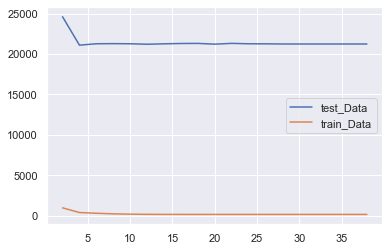

In [74]:
from sklearn.metrics import confusion_matrix
train_plot=pd.DataFrame(train_error,index=range(2,40,2),columns=["test_Data"])
test_plot=pd.DataFrame(test_error,index=range(2,40,2),columns=["t_Data"])
plotdata=pd.concat([train_plot,test_plot],axis=1)
plotdata.plot()
X_test.size

In [75]:
y_test.head()

DateTime
2020-08-10    11584.934570
2020-08-11    11784.137695
2020-08-12    11768.871094
2020-08-13    11865.698242
2020-08-14    11892.803711
Name: PriceClose2D, dtype: float64

# Model 2: ARIMA MODEL :)

In [76]:
arima2015hour=coinbase['2015':'2019'].resample('D').mean().fillna(method='ffill')['Close']


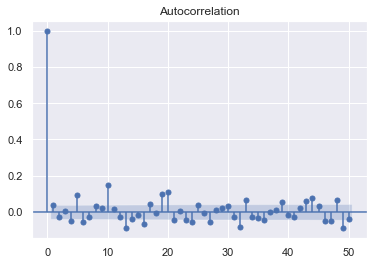

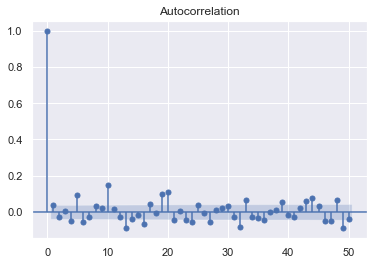

In [77]:
from statsmodels.graphics.tsaplots import plot_acf
#hourarim=arima2015hour.resample('H').mean()['Close']
plot_acf(arima2015hour.diff().dropna(), lags= 50, alpha=0.1)
#arima2015hour['Close'].pct_change().autocorr()
#dayarima.diff()
#arima2015hour.dropna().diff().plot()

In [78]:
from statsmodels.tsa.stattools import adfuller
adfuller(arima2015hour)[1]

0.3532732849155597

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
train,test = train_test_split(arima2015hour,test_size=0.24,shuffle=False)
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(arima2015hour, order=(4, 4))
result = mod.fit()

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # predict
    model = ARMA(history,order=(5,1))
    model_fit = mod.fit()
    yhat = model_fit.forecast()
    yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
    predictions.append(yhat_p)
    # observation
    obs = test[i] 
    history.append(obs)
    print(str(yhat_p)+' '+' '+ str(history[-4:])+' '+str(obs)+' '+str(i)+' ')


6448.522065811741  [6596.1098630000015, 6544.430176, 6476.709961, 6465.410156] 6465.410156 0 
6484.394008013981  [6544.430176, 6476.709961, 6465.410156, 6489.189941] 6489.189941 1 
6459.117241742499  [6476.709961, 6465.410156, 6489.189941, 6482.350098] 6482.350098 2 
6494.215691804658  [6465.410156, 6489.189941, 6482.350098, 6487.160156] 6487.160156 3 
6471.714680154718  [6489.189941, 6482.350098, 6487.160156, 6475.740234000001] 6475.740234000001 4 
6466.3907003001395  [6482.350098, 6487.160156, 6475.740234000001, 6495.839844] 6495.839844 5 
6501.011899636758  [6487.160156, 6475.740234000001, 6495.839844, 6476.290039] 6476.290039 6 
6452.320729864455  [6475.740234000001, 6495.839844, 6476.290039, 6474.75] 6474.75 7 
6484.938078047313  [6495.839844, 6476.290039, 6474.75, 6480.379883] 6480.379883 8 
6460.163356257783  [6476.290039, 6474.75, 6480.379883, 6486.3901369999985] 6486.3901369999985 9 
6488.112377669846  [6474.75, 6480.379883, 6486.3901369999985, 6332.629883] 6332.629883 10 
631

In [80]:
pd.concat([pd.DataFrame(predictions,index=test.index,columns=['predictions']),test],axis=1)

,predictions,Close
DateTime,,
2018-10-19,6448.522066,6465.410156
2018-10-20,6484.394008,6489.189941
2018-10-21,6459.117242,6482.350098
2018-10-22,6494.215692,6487.160156
2018-10-23,6471.714680,6475.740234
...,...,...
2019-12-27,7248.086210,7290.088379
2019-12-28,7286.570330,7317.990234
2019-12-29,7291.898006,7422.652832


In [81]:
error=math.sqrt(mean_squared_error(test,predictions))
error

298.71861057154365

In [82]:
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(arima2015hour, order=(4,4))
result = mod.fit()

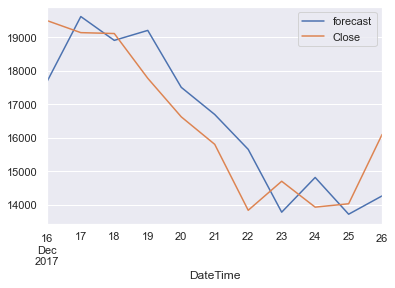

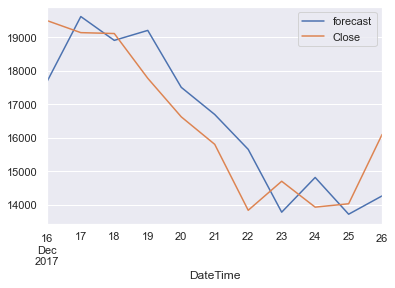

In [83]:
result.plot_predict(start=1080,end=1090)

                              ARMA Model Results                              
Dep. Variable:                  Close   No. Observations:                 1826
Model:                     ARMA(4, 4)   Log Likelihood              -12904.141
Method:                       css-mle   S.D. of innovations            283.291
Date:                Mon, 26 Apr 2021   AIC                          25828.282
Time:                        21:46:11   BIC                          25883.381
Sample:                    01-01-2015   HQIC                         25848.607
                         - 12-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3961.0457   2082.877      1.902      0.057    -121.319    8043.410
ar.L1.Close    -0.1699      0.366     -0.464      0.642      -0.887       0.547
ar.L2.Close     0.9718      0.263      3.693    

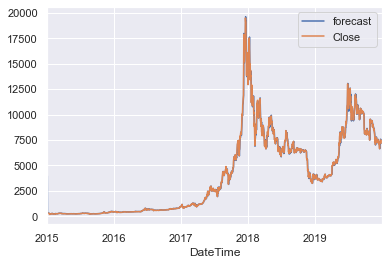

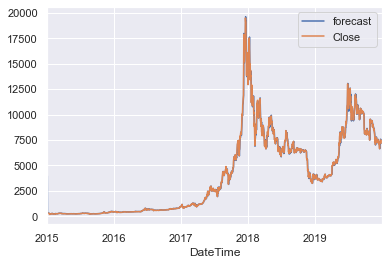

In [84]:
print(result.summary())
result.plot_predict()

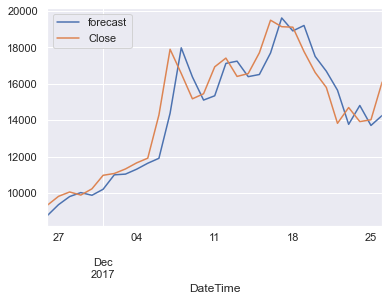

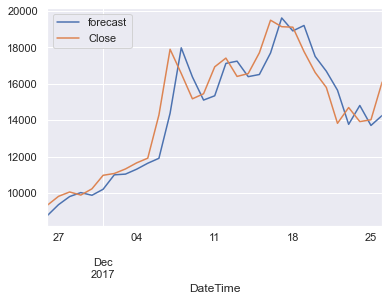

In [85]:
result.plot_predict(start=1060, end=1090)

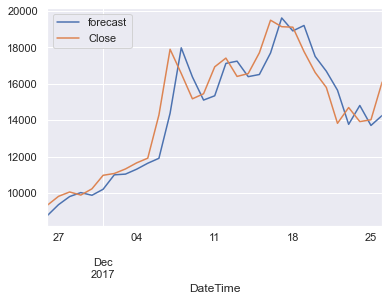

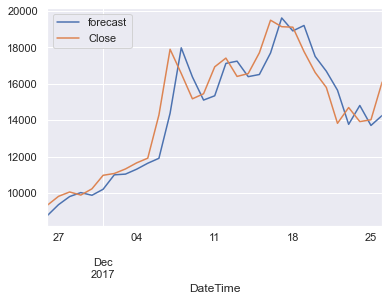

In [86]:
result.plot_predict(start=1060, end=1090)